In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [29]:
# representing fibonacci as matrix multiplication:
# f_n+1 = f_n + f_n-1 has an analagous definition of
# f_n+1 = (f_n-1, f_n) @ [1, 1].T, and f_n = (f_n-1, f_n) @ [0, 1].T
# so we can write [[f_n-2, f_n-1], [f_n-1, f_n]] @ [[0, 1], [1, 1]] = [[f_n-1, f_n], [f_n, f_n+1]]
# we can denote M_n as [[f_n-2, f_n-1], [f_n-1, f_n]], then M_n+1 = M_n @ [[0, 1], [1, 1]]
# conveniently, M_2 = [[0, 1], [1, 1]], so M_n = M_2 ^ (n - 1)

# an easy way to exponentiate matrices is by diagonalizing
# if we have M = S @ D @ S_inv, then M ^ n = S @ D @ S_inv @ S @ D @ S_inv ... @ S @ D @ S_inv 
# we can see the inner S and S_inv cancel to I, so M ^ n = S @ D ^ n @ S_inv
# conveniently, D ^ n is just each diagonal element raised to the nth-power since it is diagonal

# so, we should find S, D, S_inv such that M_2 = S @ D @ S_inv
# this can be done with the eigenvalues of M_2
# the characteristic polynomial of M_2 is det(M_2 - lambda * I) = -lambda * (1 - lamda) - 1
# = lambda^2 - lambda - 1. Setting equal to 0 we find lambda = 1/2 +- sqrt(5)/2
# from this, we can find respective eigenvectors of [(-sqrt(5) - 1)/2, 1].T, [(sqrt(5) - 1)/2, 1].T

# Therefore we can form a diagonalization of M_2 with:
S = np.array([[(-np.sqrt(5) - 1)/2, (np.sqrt(5) - 1)/2], [1, 1]])
D = np.array([(-np.sqrt(5) + 1)/2, (np.sqrt(5) + 1)/2]) # choosing to leave as array representing diagonal
S_inv = np.array([[-np.sqrt(5)/5, (-np.sqrt(5) + 5)/10], [np.sqrt(5)/5, (np.sqrt(5) + 5)/10]])

[1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 13.0, 21.0, 34.0, 55.0, 89.0, 144.0, 233.0, 377.0, 610.0, 987.0, 1597.0, 2584.0, 4181.0, 6765.0, 10946.0, 17711.0, 28657.0, 46368.0, 75025.0, 121393.0, 196418.0, 317811.0, 514229.0, 832040.0, 1346269.0, 2178309.0, 3524578.0, 5702887.0, 9227465.0, 14930352.0, 24157817.0, 39088169.0, 63245986.0, 102334155.0, 165580141.0, 267914296.0, 433494437.0, 701408733.0, 1134903170.0, 1836311903.0, 2971215073.0, 4807526976.0, 7778742049.0, 12586269025.0, 20365011074.0, 32951280099.0, 53316291173.0, 86267571272.0, 139583862445.0, 225851433717.0, 365435296162.0, 591286729879.0, 956722026041.0, 1548008755920.0, 2504730781961.0, 4052739537881.0, 6557470319842.0, 10610209857723.0, 17167680177565.0, 27777890035288.0, 44945570212853.0, 72723460248141.0, 117669030460994.0, 190392490709135.0, 308061521170130.0, 498454011879265.0, 806515533049395.0, 1304969544928660.0, 2111485077978055.0, 3416454622906716.0, 5527939700884770.0, 8944394323791486.0, 1.447233402467626e+16, 2.341672

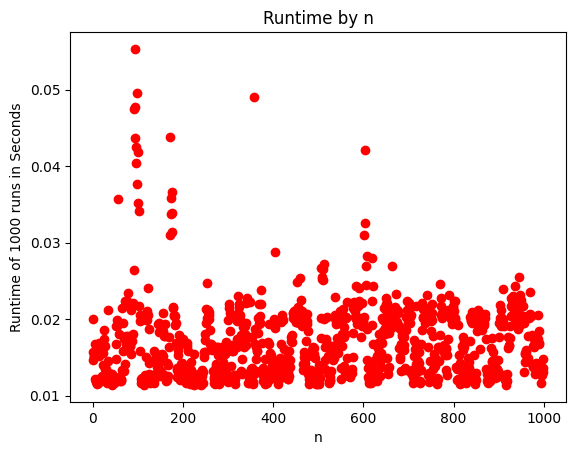

In [34]:
# implementing calculation, returning nth fibonacci number
def fib(n):
    return (S @ np.diag(np.power(D, n)) @ S_inv)[1,1]

N = 1000
fib_results = [round(fib(i),0) for i in range(N)]
times = [timeit.timeit(stmt='fib({})'.format(n), globals=globals(), number=1000) for n in range(N)]
print(fib_results)
plt.title("Runtime by n")
plt.ylabel("Runtime of 1000 runs in Seconds")
plt.xlabel("n")
plt.plot(range(N), times, 'or')